<a href="https://colab.research.google.com/github/SimicekRyutaro/seoultech-artificial-intelligence/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    # --- Block 1 ---
    # Input Shape: (32, 32, 3)
    Input((32, 32, 3)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Dropout after pooling

    # --- Block 2 ---
    # Shape is now (16, 16, 64)
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # --- Block 3 ---
    # Shape is now (8, 8, 128)
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # --- Classifier Head ---
    # Shape is now (4, 4, 256)
    Flatten(),

    # Fully connected layers
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),

    # Output layer with "softmax" for multi-class classification
    Dense(10, activation="softmax")
])

# Compile and Train neural network

In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.3969 - loss: 1.7930
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6748 - loss: 0.9338
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7407 - loss: 0.7478
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7837 - loss: 0.6281
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8184 - loss: 0.5275
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8434 - loss: 0.4568
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8638 - loss: 0.3911
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8818 - loss: 0.3406
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8965 - loss: 0.2948
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9100 - loss: 0.2585
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9210 - loss: 0.2287
Epoch 12

## Evaluate neural network performance


In [6]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.8392 - loss: 0.6569


[0.6569387912750244, 0.8392000198364258]

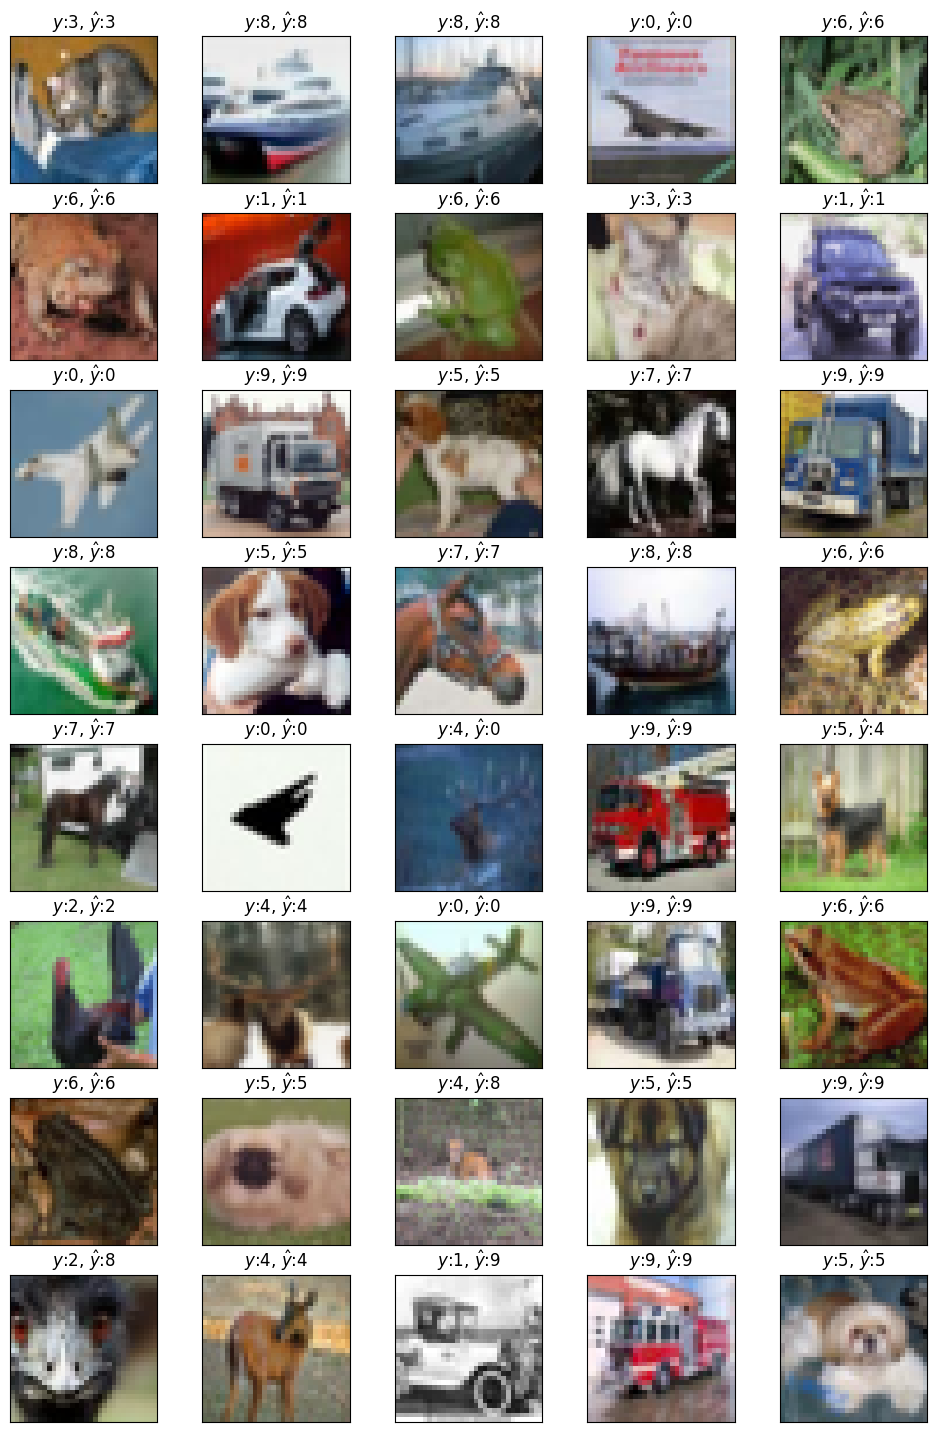

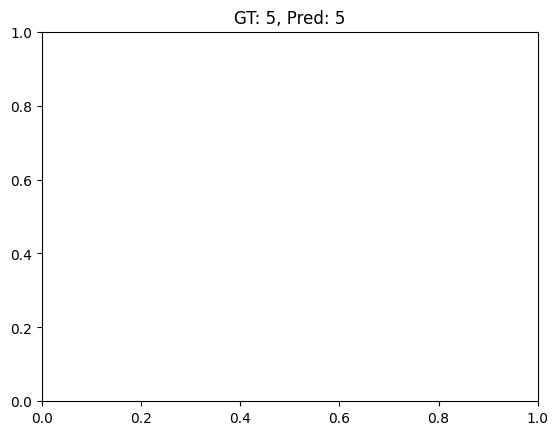

In [7]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8392000198364258
